# Neural Network Project - Keerthana Punithan

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout,Flatten
from tensorflow.keras import optimizers

## Read the data from the h5py file and understand the train/test splits

In [27]:
data=h5py.File('SVHN_single_grey1.h5','r')

In [28]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [29]:
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]
X_val = data['X_val'][:]
y_val = data['y_val'][:]

In [30]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


## Reshape and normalize the train and test features 

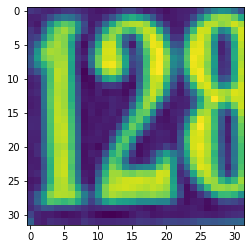

In [31]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()

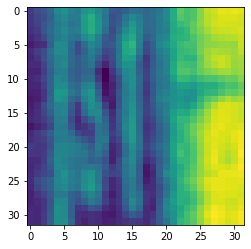

In [32]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()

In [33]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [34]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 1024) (18000,)


In [35]:
X_train = preprocessing.normalize(X_train)

In [36]:
X_test = preprocessing.normalize(X_test)

## One hot encode the labels for train and test data

In [37]:
# converting y data into categorical (one-hot encoding)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax 

In [13]:
model = Sequential()   

In [15]:
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

## Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation

In [16]:
adam = optimizers.Adam(lr = 0.001)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

## Fit and evaluate the model. Print the loss and accuracy for the test data

In [40]:
history = model.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5054 - accuracy: 0.8459
Epoch 2/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5058 - accuracy: 0.8443
Epoch 3/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5034 - accuracy: 0.8456
Epoch 4/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5013 - accuracy: 0.8475
Epoch 5/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5013 - accuracy: 0.8483
Epoch 6/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5020 - accuracy: 0.8466
Epoch 7/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4991 - accuracy: 0.8471
Epoch 8/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.8498
Epoch 9/200
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4993 - accuracy: 0.8471
Epoch 10/200
1313/1313 [==============================] - 2s 2ms/step - l

1313/1313 [==============================] - 2s 1ms/step - loss: 0.4147 - accuracy: 0.8729
Epoch 158/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4118 - accuracy: 0.8755
Epoch 159/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4125 - accuracy: 0.8739
Epoch 160/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4127 - accuracy: 0.8742
Epoch 161/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4113 - accuracy: 0.8743
Epoch 162/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4119 - accuracy: 0.8742
Epoch 163/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4109 - accuracy: 0.8744
Epoch 164/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4117 - accuracy: 0.8738
Epoch 165/200
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4099 - accuracy: 0.8743
Epoch 166/200
1313/1313 [==============================] - 2s 1ms/ste

In [41]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 974us/step - loss: 0.6428 - accuracy: 0.8276


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8275555372238159


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                51250     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [44]:
print(model.metrics_names)
print(results)  

['loss', 'accuracy']
[0.6428399682044983, 0.8275555372238159]


## Observations:

- We have applied flatten layer followed by dense layers

- Activation functions relu and softmax is used

- With adam optimizer and the loss function as categorical cross entropy, we get test accuracy of 82% and loss of 64%